# Goal: Data Clean

In [67]:
""" 
Goal: Clean the Data
Author: Rudra Prasad Bhuyan
"""

' \nGoal: Clean the Data\nAuthor: Rudra Prasad Bhuyan\n'

In [68]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-02\data\lev-02_merged.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('Person_Serial_No', String),
        ('Relation_to_Head', String),
        ('Gender', String),
        ('Age', String),
        ('Marital_Status', String),
        ('Education_Level', String),
        ('Years_of_Education', String),
        ('Used_Internet_Last_30_Days', String),
        ('Days_Away_From_Home_Last_30_Days', String),
        ('Meals_Usually_Taken_Per_Day', String),
        ('

In [70]:
mp_data = pdf.filter(
    pl.col('State') == '23'
)

mp_data['State'].unique()

State
str
"""23"""


# Break down all useful variables into separate group

In [71]:
lev_02_hh = [ 'Revisit_Status', 'FDQ_Original_Member', 'Multiplier']

lev_02_food = ['Meals_Usually_Taken_Per_Day','Meals_From_School',
               'Meals_From_Employer','Meals_Other',
               'Meals_On_Payment','Meals_At_Home']

lev_02_digital = ['Used_Internet_Last_30_Days']

lev_02__behavior = ['Days_Away_From_Home_Last_30_Days']

lev_02_user = ['FSU_Serial_No', 'Relation_to_Head','Gender',
               'Age', 'Marital_Status', 
               'Education_Level', 'Years_of_Education']

In [72]:
lev_02_cols = (
    lev_02_hh
    + lev_02_food
    + lev_02_digital
    + lev_02__behavior
    + lev_02_user
)

In [73]:
mp_data = mp_data[lev_02_cols]

In [74]:
mp_data

Revisit_Status,FDQ_Original_Member,Multiplier,Meals_Usually_Taken_Per_Day,Meals_From_School,Meals_From_Employer,Meals_Other,Meals_On_Payment,Meals_At_Home,Used_Internet_Last_30_Days,Days_Away_From_Home_Last_30_Days,FSU_Serial_No,Relation_to_Head,Gender,Age,Marital_Status,Education_Level,Years_of_Education
str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""1""","""1""",131077,"""2""","""""","""""","""""","""""","""60""","""2""","""0""","""44081""","""1""","""2""","""46""","""3""","""01""",""""""
"""1""","""1""",131077,"""2""","""""","""""","""""","""""","""60""","""1""","""0""","""44081""","""5""","""1""","""19""","""1""","""07""","""12"""
"""1""","""1""",131077,"""2""","""""","""""","""""","""""","""60""","""1""","""0""","""44081""","""5""","""2""","""21""","""1""","""07""","""12"""
"""1""","""1""",131077,"""2""","""""","""""","""""","""""","""60""","""2""","""0""","""44081""","""1""","""1""","""52""","""2""","""03""","""5"""
"""1""","""1""",131077,"""2""","""""","""""","""""","""""","""60""","""2""","""0""","""44081""","""2""","""2""","""50""","""2""","""01""",""""""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""1""","""1""",173023,"""2""","""""","""""","""""","""""","""60""","""1""","""0""","""25137""","""1""","""1""","""42""","""2""","""05""","""8"""
"""1""","""1""",173023,"""2""","""""","""""","""""","""""","""57""","""1""","""0""","""25137""","""2""","""2""","""40""","""2""","""05""","""8"""
"""1""","""1""",173023,"""2""","""""","""""","""""","""""","""60""","""1""","""0""","""25137""","""5""","""1""","""11""","""1""","""04""","""5"""


## Casting

In [75]:
mp_data = mp_data.with_columns(
    [pl.col(col).cast(pl.Int32, strict=False) for col in lev_02_cols]
)

## House hold

In [76]:
mp_data[lev_02_hh]

Revisit_Status,FDQ_Original_Member,Multiplier
i32,i32,i32
1,1,131077
1,1,131077
1,1,131077
1,1,131077
1,1,131077
…,…,…
1,1,173023
1,1,173023
1,1,173023


In [77]:
mp_data[lev_02_hh].describe()

statistic,Revisit_Status,FDQ_Original_Member,Multiplier
str,f64,f64,f64
"""count""",64952.0,64864.0,64952.0
"""null_count""",0.0,88.0,0.0
"""mean""",1.003741,1.0,112568.796927
"""std""",0.080231,0.0,68371.178028
"""min""",1.0,1.0,1913.0
"""25%""",1.0,1.0,67000.0
"""50%""",1.0,1.0,115615.0
"""75%""",1.0,1.0,144808.0
"""max""",3.0,1.0,888474.0


- FDQ feature only have the null values
- If we see the unique value 
- We found only 1 so we replace with one 

In [78]:
mp_data['FDQ_Original_Member'].unique()

FDQ_Original_Member
i32
null
1


In [79]:
mp_data = mp_data.with_columns(
    pl.col('FDQ_Original_Member').fill_null(strategy='one')
)

In [80]:
mp_data['FDQ_Original_Member'].unique()

FDQ_Original_Member
i32
1


## Food 

In [81]:
mp_data[lev_02_food]

Meals_Usually_Taken_Per_Day,Meals_From_School,Meals_From_Employer,Meals_Other,Meals_On_Payment,Meals_At_Home
i32,i32,i32,i32,i32,i32
2,null,null,null,null,60
2,null,null,null,null,60
2,null,null,null,null,60
2,null,null,null,null,60
2,null,null,null,null,60
…,…,…,…,…,…
2,null,null,null,null,60
2,null,null,null,null,57
2,null,null,null,null,60


In [82]:
mp_data[lev_02_food].describe()

statistic,Meals_Usually_Taken_Per_Day,Meals_From_School,Meals_From_Employer,Meals_Other,Meals_On_Payment,Meals_At_Home
str,f64,f64,f64,f64,f64,f64
"""count""",64833.0,10670.0,7743.0,13515.0,9362.0,64690.0
"""null_count""",119.0,54282.0,57209.0,51437.0,55590.0,262.0
"""mean""",2.304922,5.541706,0.164665,2.536293,1.228904,67.543098
"""std""",0.522551,8.747545,2.737623,5.487476,6.034109,15.35473
"""min""",0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",2.0,0.0,0.0,0.0,0.0,60.0
"""50%""",2.0,0.0,0.0,1.0,0.0,60.0
"""75%""",3.0,15.0,0.0,3.0,0.0,87.0
"""max""",3.0,26.0,60.0,90.0,88.0,95.0


In [83]:
# Percentage value is null
(mp_data[lev_02_food].null_count() / mp_data.shape[0]) * 100 

Meals_Usually_Taken_Per_Day,Meals_From_School,Meals_From_Employer,Meals_Other,Meals_On_Payment,Meals_At_Home
f64,f64,f64,f64,f64,f64
0.183212,83.572484,88.078889,79.192327,85.586279,0.403375


**Clean Method:**

- `Meals_Usually_Taken_Per_Day`, `Meals_At_Home` -> Safely clean with anything
- Rest Columns fill with 0 --> Because if they have meal then it already present in `Meals_At_Home`.
- May be most of person not from school and they eat at home so this null value created 

In [84]:
mp_data = mp_data.with_columns(
    pl.col('Meals_From_School').fill_null(strategy='zero'),
    pl.col('Meals_From_Employer').fill_null(strategy='zero'),
    pl.col('Meals_Other').fill_null(strategy='zero'),
    pl.col('Meals_On_Payment').fill_null(strategy='zero'),
)

<Axes: ylabel='Count'>

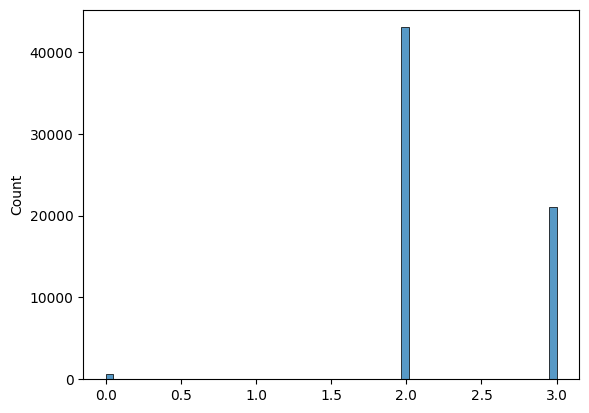

In [85]:
sns.histplot(mp_data['Meals_Usually_Taken_Per_Day'])

In [86]:
mp_data = mp_data.with_columns(
    pl.col('Meals_Usually_Taken_Per_Day').fill_null(value=3)
)

<Axes: ylabel='Count'>

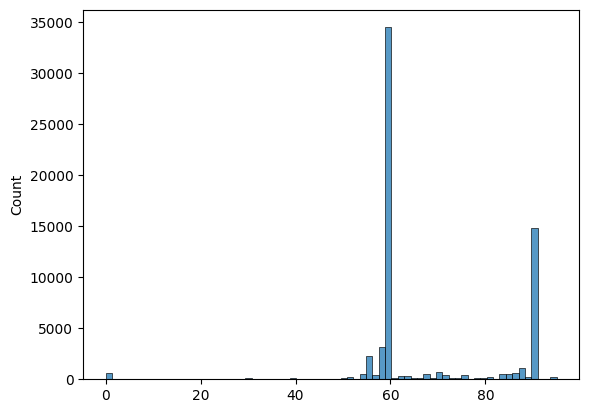

In [87]:
sns.histplot(mp_data['Meals_At_Home'])

In [88]:
mp_data = mp_data.with_columns(
    pl.col('Meals_At_Home').fill_null(strategy='mean')
)

<Axes: ylabel='Count'>

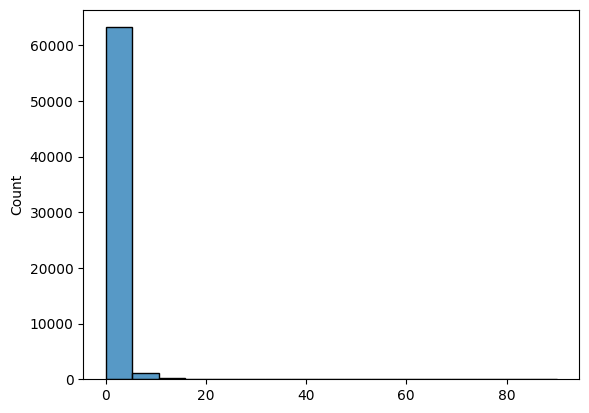

In [89]:
sns.histplot(mp_data['Meals_Other'])

<Axes: ylabel='Count'>

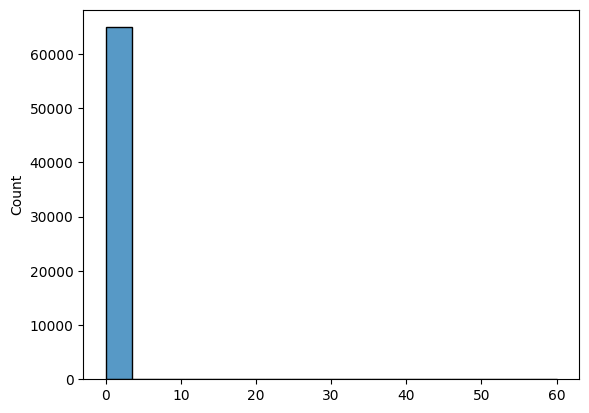

In [90]:
sns.histplot(mp_data['Meals_From_Employer'])

<Axes: ylabel='Count'>

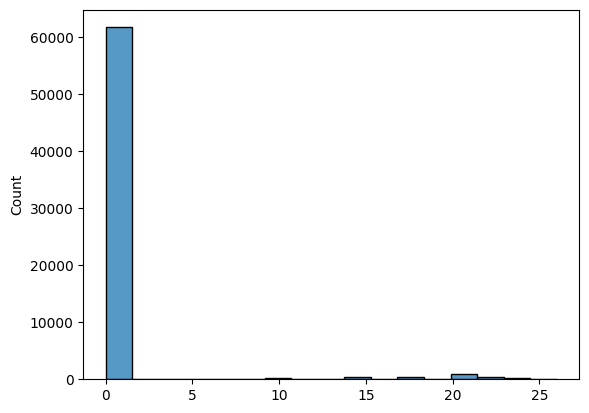

In [91]:
sns.histplot(mp_data['Meals_From_School'])

## Digital

In [92]:
mp_data[lev_02_digital]

Used_Internet_Last_30_Days
i32
2
1
1
2
2
…
1
1
1


In [93]:
mp_data[lev_02_digital].describe()

statistic,Used_Internet_Last_30_Days
str,f64
"""count""",62395.0
"""null_count""",2557.0
"""mean""",1.443529
"""std""",0.496805
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",2.0
"""max""",2.0


In [94]:
# Percentage null value
(mp_data[lev_02_digital + lev_02__behavior].null_count() / mp_data.shape[0]) * 100 

Used_Internet_Last_30_Days,Days_Away_From_Home_Last_30_Days
f64,f64
3.936753,0.135485


- Here 1: Yes and 2: No
- I change the labeling and make according to me 
- For digital I do the forward fill null strategy

<Axes: ylabel='Count'>

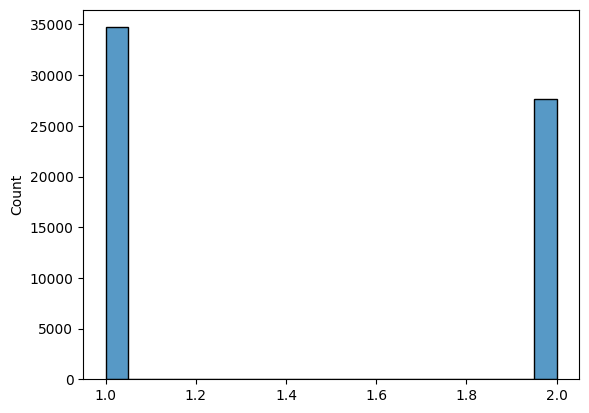

In [95]:
sns.histplot(mp_data['Used_Internet_Last_30_Days'])

In [96]:
mp_data = mp_data.with_columns(
    pl.col('Used_Internet_Last_30_Days').fill_null(strategy='forward'),
)

In [97]:
mp_data['Used_Internet_Last_30_Days'].unique()

Used_Internet_Last_30_Days
i32
1
2


In [98]:
# 1: Yes and 2: No ---> 1:Yes and 0:No

In [99]:
mp_data = mp_data.with_columns(
    pl.when(pl.col("Used_Internet_Last_30_Days") == 1)
      .then(1)
      .when(pl.col("Used_Internet_Last_30_Days") == 2)
      .then(0)
      .otherwise(None)  # or 0 if you prefer
      .alias("Used_Internet_Last_30_Days")
)


## Behavior

In [100]:
mp_data[lev_02__behavior]

Days_Away_From_Home_Last_30_Days
i32
0
0
0
0
0
…
0
0
0


In [101]:
mp_data[lev_02__behavior].describe()

statistic,Days_Away_From_Home_Last_30_Days
str,f64
"""count""",64864.0
"""null_count""",88.0
"""mean""",0.187022
"""std""",1.202743
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",0.0
"""max""",30.0


- Due to most of value are 0 so I also do 0 

<Axes: ylabel='Count'>

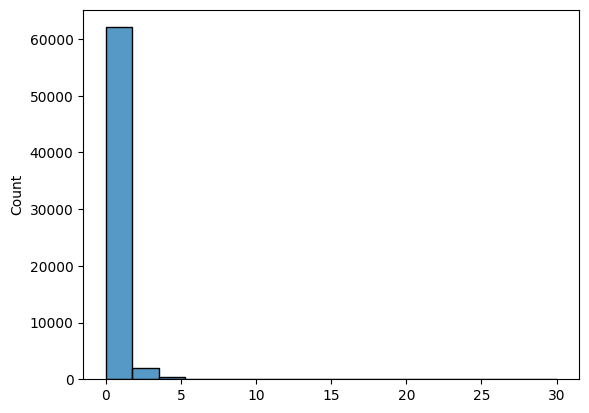

In [102]:
sns.histplot(mp_data['Days_Away_From_Home_Last_30_Days'])

In [ ]:
mp_data = mp_data.with_columns(
    pl.col('Days_Away_From_Home_Last_30_Days').fill_null(strategy='one')
)

## User

In [104]:
mp_data[lev_02_user]

FSU_Serial_No,Relation_to_Head,Gender,Age,Marital_Status,Education_Level,Years_of_Education
i32,i32,i32,i32,i32,i32,i32
44081,1,2,46,3,1,null
44081,5,1,19,1,7,12
44081,5,2,21,1,7,12
44081,1,1,52,2,3,5
44081,2,2,50,2,1,null
…,…,…,…,…,…,…
25137,1,1,42,2,5,8
25137,2,2,40,2,5,8
25137,5,1,11,1,4,5


In [105]:
mp_data[lev_02_user].describe()

statistic,FSU_Serial_No,Relation_to_Head,Gender,Age,Marital_Status,Education_Level,Years_of_Education
str,f64,f64,f64,f64,f64,f64,f64
"""count""",64952.0,64952.0,64952.0,64952.0,64952.0,64952.0,47934.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,17018.0
"""mean""",36407.862083,3.630142,1.482387,30.484974,1.627694,4.703458,8.965056
"""std""",8555.76459,2.006095,0.499909,19.286044,0.597384,3.339115,4.325704
"""min""",25000.0,1.0,1.0,0.0,1.0,1.0,0.0
"""25%""",25296.0,2.0,1.0,15.0,1.0,2.0,5.0
"""50%""",42399.0,4.0,1.0,28.0,2.0,4.0,8.0
"""75%""",42742.0,5.0,2.0,45.0,2.0,6.0,12.0
"""max""",44199.0,9.0,3.0,105.0,4.0,13.0,20.0


In [106]:
# Percentage null value
(mp_data[lev_02_user].null_count() / mp_data.shape[0]) * 100 

FSU_Serial_No,Relation_to_Head,Gender,Age,Marital_Status,Education_Level,Years_of_Education
f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.0,26.200887


In [107]:
mp_data['Years_of_Education'].unique().to_list()

[None,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20]

In [108]:
mp_data['Years_of_Education'].n_unique()

22

In [109]:
mp_data['Years_of_Education'].skew()

0.19957148750414322

- If you notice data is 26 empty so 
- We can't directly replace with 0 so 
- we check skewness it is not even 1 
- so now we safe
- Slight Skew ok to fill with the mean

In [110]:
mp_data['Years_of_Education'].value_counts()

Years_of_Education,count
i32,u32
1,1201
0,135
3,1949
13,622
6,1797
…,…
5,6015
4,2025
9,2833


<Axes: ylabel='Count'>

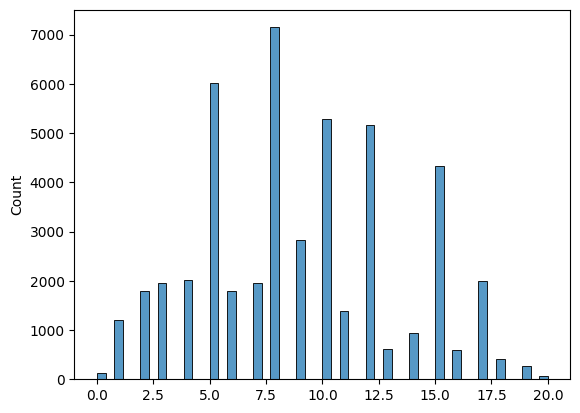

In [111]:
sns.histplot(mp_data['Years_of_Education'])

In [112]:
#sns.countplot(mp_data['Years_of_Education'])

In [113]:
mp_data = mp_data.with_columns(
    pl.col('Years_of_Education').fill_null(strategy='mean')
)

In [114]:
mp_data.null_count()

Revisit_Status,FDQ_Original_Member,Multiplier,Meals_Usually_Taken_Per_Day,Meals_From_School,Meals_From_Employer,Meals_Other,Meals_On_Payment,Meals_At_Home,Used_Internet_Last_30_Days,Days_Away_From_Home_Last_30_Days,FSU_Serial_No,Relation_to_Head,Gender,Age,Marital_Status,Education_Level,Years_of_Education
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
mp_data['Age'].unique()

Age
i32
0
1
2
3
4
…
98
101
102


In [116]:
mp_data.filter(
    pl.col('Age') == 0
).shape

# 681 values are 0 how 😆

(681, 18)

- How it is possible to age should be zero
- Check the skewness data is missing may be so it fill with 
- Very funny way 😆
- So I fill with the mean 

In [117]:
mp_data['Age'].skew()

0.4509959368658372

In [118]:
mp_data['Age'].describe()

statistic,value
str,f64
"""count""",64952.0
"""null_count""",0.0
"""mean""",30.484974
"""std""",19.286044
"""min""",0.0
"""25%""",15.0
"""50%""",28.0
"""75%""",45.0
"""max""",105.0


<Axes: ylabel='Count'>

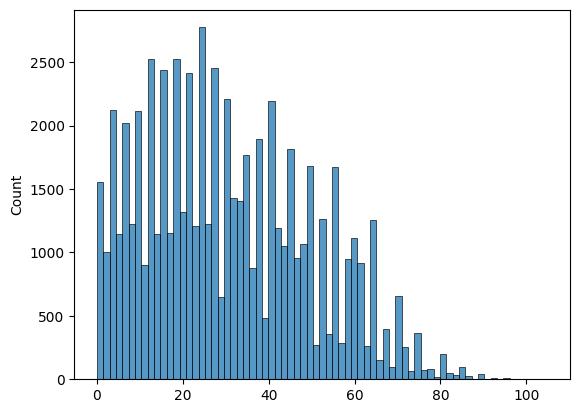

In [119]:
sns.histplot(mp_data['Age'])

In [120]:
mp_data['Age'].mean()

30.48497351890627

In [121]:
mp_data.filter(
    pl.col('Age') == 0
).select(pl.col('Age'))

Age
i32
0
0
0
0
0
…
0
0
0


In [122]:
mp_data = mp_data.with_columns(
    pl.when(pl.col('Age') == 0)
      .then(30)
      .otherwise(pl.col('Age'))
      .alias("Age")  
)


In [123]:
(mp_data.filter(pl.col("Age") == 0)).height
# should return 0 if all 0s were replaced

0

In [124]:
mp_data['Marital_Status'].unique()

Marital_Status
i32
1
2
3
4


In [125]:
mp_data['Years_of_Education'].unique()

Years_of_Education
i32
0
1
2
3
4
…
16
17
18


In [126]:
mp_data['Education_Level'].unique()

Education_Level
i32
1
2
3
4
5
…
8
10
11


In [127]:
"""
1	never married	483369	
2	currently married(including living together)	557180	
3	widowed	62062	
4	divorced/separated
"""

'\n1\tnever married\t483369\t\n2\tcurrently married(including living together)\t557180\t\n3\twidowed\t62062\t\n4\tdivorced/separated\n'

In [128]:
#mp_data = mp_data.drop('literal')

mp_data.columns

['Revisit_Status',
 'FDQ_Original_Member',
 'Multiplier',
 'Meals_Usually_Taken_Per_Day',
 'Meals_From_School',
 'Meals_From_Employer',
 'Meals_Other',
 'Meals_On_Payment',
 'Meals_At_Home',
 'Used_Internet_Last_30_Days',
 'Days_Away_From_Home_Last_30_Days',
 'FSU_Serial_No',
 'Relation_to_Head',
 'Gender',
 'Age',
 'Marital_Status',
 'Education_Level',
 'Years_of_Education']

In [129]:
# All zero no null values 🙌

# Some Feature Engineering ideas
# - is_meal_done (Check user done meal or not, 1:Yes, 0:No)
# - is_educated (1:Yes, 0:No)
# - is_labour (Days_Away_From_Home_Last_30_Days if this is max then 25) & 
#   (if Meals_Usually_Taken_Per_Day is less than and equal to 0)
# make cluster for the this year of eductions Years_of_Education and education level 

In [130]:
mp_data['Years_of_Education'].unique().to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [131]:
# is_nuclear_family (my assumption father, mother, 3 child) because we focus on the rural village
# so anything which is > than 5 include as joint_family

In [132]:
# Done 🙌
# Now Again eda on this clean data then 
# Feature engineering 
# Then again Clean data

In [134]:
mp_data.write_csv(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-02\data2\lev_02_mp_clean.csv")
mp_data.write_parquet(r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-02\data2\lev_02_mp_clean.parquet", compression="zstd")